In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



#⚠️⚠️libreria instalada en entorno base
import pycountry

In [2]:
shark = pd.read_csv("data/clean.csv",encoding = "ISO-8859-1")

In [3]:
#✅RUN
#Borro la nueva columna que se añade al importar el csv limpio
shark.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
#shark.columns

In [5]:
#✅RUN
# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [6]:
#✅RUN
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [7]:
#shark.head()

In [8]:
#✅RUN
#Agrupo por la columna Sex para obtener un gráfico de comparativa por género
shark.groupby("Sex").count()

,Type,Country,Area,Location,Activity,Age,Fatal,Time,NewDate,NewMonth,NewYear,NewDay,NewAge,NewFatal,NewSpecies
Sex,,,,,,,,,,,,,,,
F,509,509,507,504,498,445,476,381,486,486,486,486,429,509,197
M,3565,3565,3521,3521,3521,2798,3386,2401,3368,3368,3368,3368,2727,3565,1515
unknown,64,64,64,64,64,18,64,58,60,60,60,60,13,64,39


In [9]:
#✅RUN
#Gráfico básico de comparativa por género
#first_graphic = sns.countplot(x=shark.Sex, color="#96D5D5");
#first_graphic.set_xlabel("Gender", fontsize = 15)
#first_graphic.set_ylabel("Total", fontsize = 15)
#first_graphic.set_title("Comparison by gender", weight="bold", fontsize=20);

In [10]:
#✅RUN
#Gráfico básico de comparativa por género
first_graphic = shark["Sex"].value_counts()
colors = ["#5B8989","#7BB3B3","#96D5D5"]
gender = ["Male","Female","No data"]

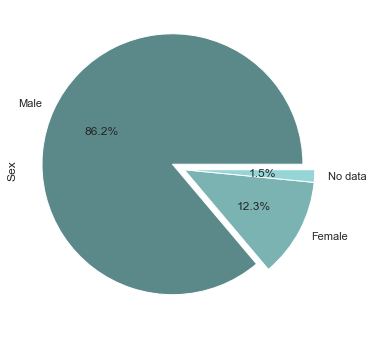

In [12]:
desfase = (0.1, 0, 0)
first_graphic.plot.pie(autopct="%.1f%%", colors=colors, labels=gender, explode=desfase);

In [ ]:
########⚠️⚠️NO HE PODIDO GUARDARLO 
#first_graphic.figure.savefig("img/first_graphic2.jpg", dpi=1000)

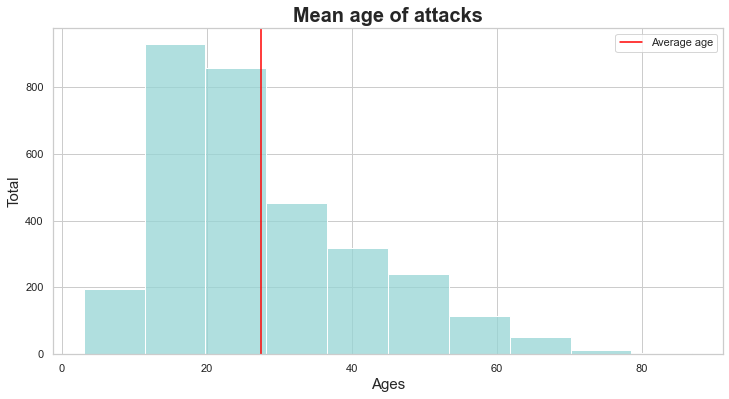

In [29]:
#✅RUN
#Gráfico de media de las edades de las personas atacadas
second_graphic = sns.histplot(x=shark.NewAge, bins=10, color="#96D5D5")
second_graphic.axvline(x=shark.NewAge.mean(), c="red", label="Average age");
plt.legend();
second_graphic.set_xlabel("Ages", fontsize = 15)
second_graphic.set_ylabel("Total", fontsize = 15)
second_graphic.set_title("Mean age of attacks", weight="bold", fontsize=20);

In [14]:
#second_graphic.figure.savefig("img/second_graphic.jpg", dpi=1000)

In [30]:
#✅RUN
#Gráfico tipo mapa para ver las zonas donde se producen los ataques
thrid_graphic = shark['Country'].unique().max()
thrid_graphic

'YEMEN '

In [31]:
#✅RUN
#Función para obtener en una columna nueva el alpha de cada país que es requerido para que funcione la librería
def get_alpha_3(location):
    try:
        return pycountry.countries.get(name=location).alpha_3
    except:
        return None
shark['Code'] = shark['Country'].apply(lambda x: get_alpha_3(x))

In [32]:
#✅RUN
#Se pinta el gráfico de mapa interactivo
fig = px.choropleth(shark,locations='Code',
                   color='Country',
                   hover_name='Country',
                   color_continuous_scale=px.colors.sequential.Plasma,
                   title = 'Shark attacks by countries')
fig.show()
#Lo guardo con la opción de plotly para descargar (arriba derecha mapa 📸)

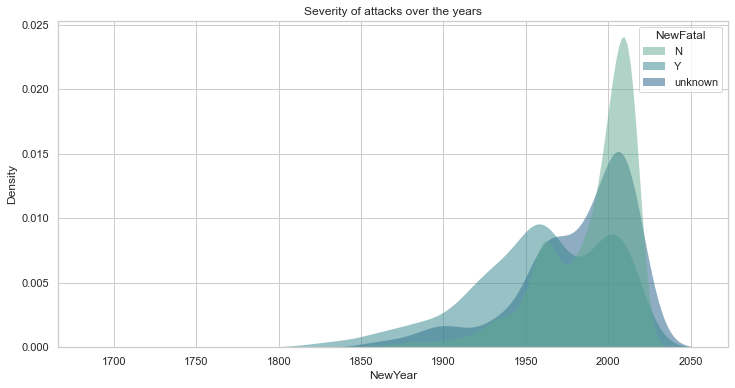

In [39]:
#✅RUN
#Gráfico de gravedad de los ataques a lo largo de los años

fourth_graphic = sns.kdeplot(
   data=shark, x="NewYear", hue="NewFatal",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0
).set(title='Severity of attacks over the years');

In [44]:
########⚠️⚠️NO HE PODIDO GUARDARLO
#fourth_graphic.savefig("img/fourth_graphic.jpg", dpi=1000)

In [117]:
#✅RUN
#Gráfico de gravedad de los ataques por especie
fifth_graphic = px.histogram(shark, x='NewSpecies', title='Species attacks', color="NewFatal", barmode='overlay')

In [116]:
fifth_graphic